In [5]:
# Source - https://stackoverflow.com/a
# Posted by Abdullah Akhtar
# Retrieved 2025-12-14, License - CC BY-SA 4.0

!pip3 install pandas --user


In [9]:
import sys  
!{sys.executable} -m pip install pandas

In [13]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 15.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.4 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import re
from collections import Counter
import sys
!{sys.executable} -m pip install numpy
!pip3 install pandas
import matplotlib.pyplot as plt
!{sys.executable} -m pip install --break-system-packages nltk
from nltk import word_tokenize
from nltk.corpus import stopwords


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]]


In [4]:
SCRIPTS_PATH = '/Users/purnima/Documents/Movie_Analysis/archive/screenplay_data/data/raw_texts/raw_texts'

In [5]:
files = [f for f in os.listdir(SCRIPTS_PATH) if f.endswith('.txt')]
print(f'Found {len(files)} script files')

Found 2858 script files


In [14]:
import nltk

# Download stopwords
nltk.download('stopwords')

# Also download punkt (for tokenization)
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/purnima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/purnima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/purnima/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
stop_words = set(stopwords.words('english'))

In [23]:
def tokenize(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]
    return tokens

In [24]:
he_counts = Counter()
she_counts = Counter()

In [25]:
for f in files:
    with open(os.path.join(SCRIPTS_PATH, f), encoding='utf-8', errors='ignore') as file:
        text = file.read()
        tokens = tokenize(text)

        for i in range(len(tokens) - 1):
            if tokens[i] == 'he':
                next_word = tokens[i+1]
                if next_word not in stop_words and len(next_word) > 2:
                    he_counts[next_word] += 1
            elif tokens[i] == 'she':
                next_word = tokens[i+1]
                if next_word not in stop_words and len(next_word) > 2:
                    she_counts[tokens[i+1]] += 1

print('Bigram extraction complete')

Bigram extraction complete


In [29]:
import pandas as pd
import numpy as np

In [30]:
def log_odds_ratio(a, b):
    total_a = sum(a.values())
    total_b = sum(b.values())
    vocab = set(a) | set(b)
    results = {}

    for word in vocab:
        count_a = a.get(word, 0) + 1
        count_b = b.get(word, 0) + 1
        results[word] = np.log((count_a / total_a) / (count_b / total_b))

    return results

scores = log_odds_ratio(he_counts, she_counts)
df = pd.DataFrame(scores.items(), columns=['word', 'log_odds']).sort_values('log_odds')
df.head()


,word,log_odds
1158,pregnant,-3.751936
7125,purrs,-3.299951
5214,hysterical,-3.145800
14326,dates,-3.145800
16299,curtseys,-3.145800


In [31]:
top_she = df.head(15)
top_he = df.tail(15)

In [32]:
print(f'\nhe_counts total: {sum(he_counts.values())}')
print(f'she_counts total: {sum(she_counts.values())}')
print(f'\nTop 10 "he" bigrams: {he_counts.most_common(10)}')
print(f'Top 10 "she" bigrams: {she_counts.most_common(10)}')


he_counts total: 549490
she_counts total: 283751

Top 10 "he" bigrams: [('looks', 28270), ('turns', 14727), ('sees', 11515), ('takes', 10652), ('walks', 7213), ('gets', 6832), ('goes', 6720), ('pulls', 6577), ('starts', 6455), ('reaches', 5579)]
Top 10 "she" bigrams: [('looks', 16511), ('turns', 8502), ('takes', 5555), ('sees', 5339), ('smiles', 4203), ('walks', 3909), ('goes', 3621), ('starts', 3556), ('gets', 3544), ('pulls', 3344)]


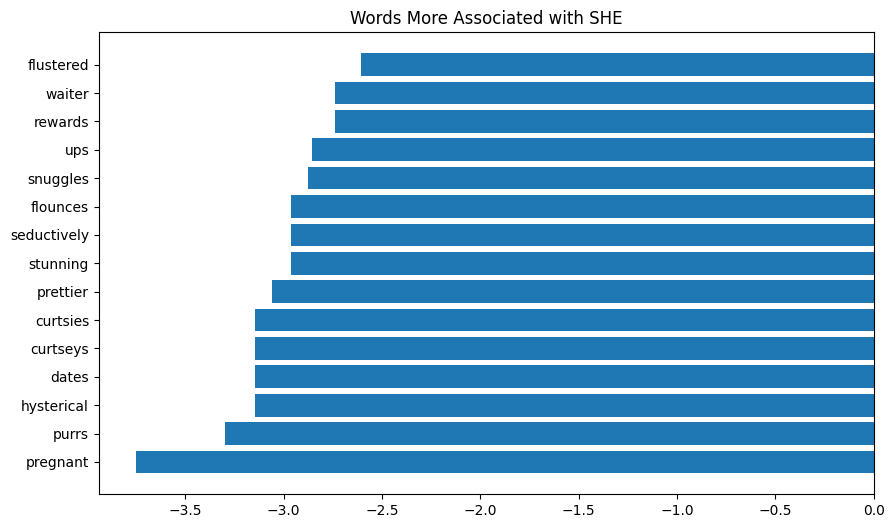

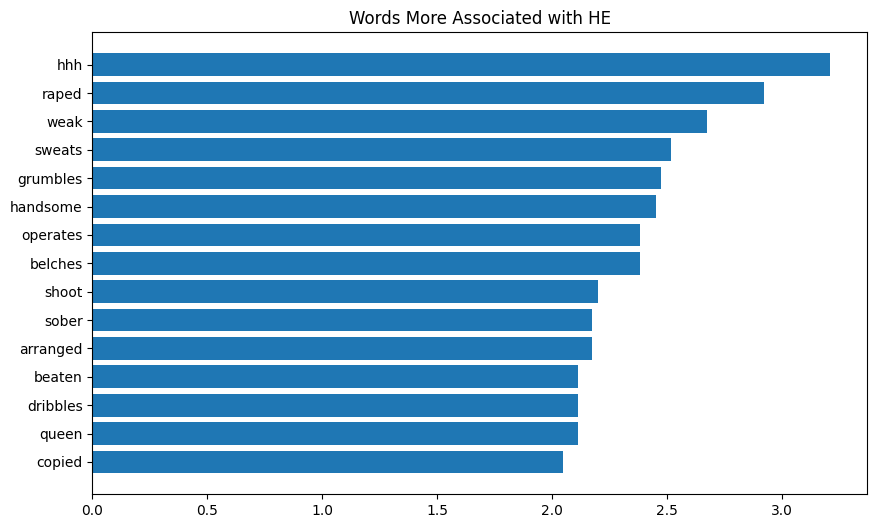

In [33]:
plt.figure(figsize=(10,6))
plt.barh(top_she['word'], top_she['log_odds'])
plt.title('Words More Associated with SHE')
plt.show()

plt.figure(figsize=(10,6))
plt.barh(top_he['word'], top_he['log_odds'])
plt.title('Words More Associated with HE')
plt.show()